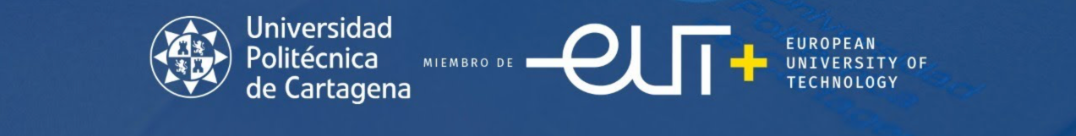

**MACHINE LEARNING II**

# EXAMEN DE PRÁCTICAS <br> TEMA 3 - RAZONAMIENTO FUZZY


## **Normativa del examen**
- Debe resolver los ejercicios planteados en las celdas de código a continuación del enunciado.
- __SOLAMENTE PUEDE UTILIZAR__ las librerías importadas en la siguiente celda de código.
- __PUEDE__ consultar el material desarrollado en las prácticas.
- Se recomienda __CONTESTAR A TODOS LOS APARTADOS, AUNQUE EL ANTERIOR NO FUNCIONE__, y de esa manera evitar que posibles errores por falta de tiempo le resten puntos inmerecidamente. 
- ESTÁ __TOTALMENTE PROHIBIDO__ EL USO DE APLICACIONES CHAT-GPT, CO-PILOT O SIMILARES. SU USO PUEDE CONLLEVAR A QUE SE CONSIDERE LA PRUEBA DIRECTAMENTE COMO SUSPENSA.
- Una vez terminado el examen, el fichero .ipynb debe ser subido a la correspondiente tarea del Aula Virtual.

In [1]:
#Implemente las librerías
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


# Cuestión 1 - Operaciones con Conjuntos Difusos (5 puntos)


Implemente el código para obtener los siguientes conjuntos difusos a partir de las funciones de pertenencia definidas en prácticas y de las operaciones estudiadas incluyendo las pertenecientes a modificadores lingüísticos.


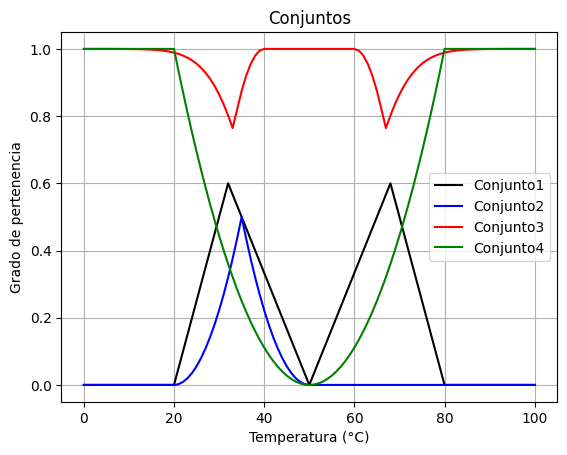


In [2]:
# Definición el rango de valores para la temperatura (0°C a 100°C)
temperatura = np.arange(0, 101, 1)

conjunto1 = 0.6 * np.fmax(fuzz.trimf(temperatura, [20, 32, 50]), fuzz.trimf(temperatura, [50, 70, 80]))
conjunto2 = 0.5 * np.power(fuzz.trimf(temperatura, [20, 35, 50]), 2)

# CONJUNTO 3:
a = fuzz.zmf(temperatura, 15, 68)
b = fuzz.pimf(temperatura, 20, 40, 60, 80)
c = fuzz.smf(temperatura, 32, 85)
ab = np.fmax(a, b)
conjunto3 = np.fmax(ab, c)

# CONJUNTO 4:
conjunto4 = 1 - np.sqrt(fuzz.trapmf(temperatura, [20, 45, 60, 80]))


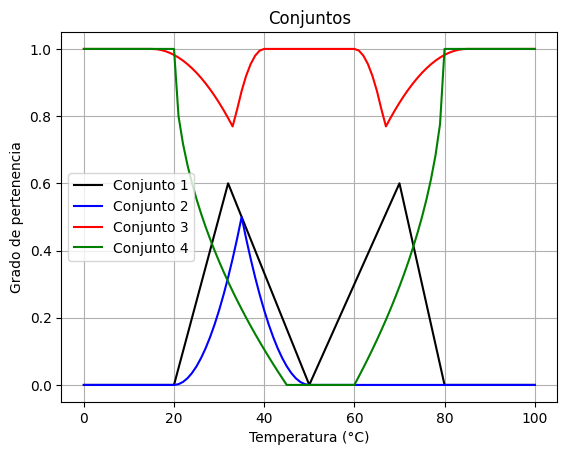

In [3]:
# Visualizar las funciones de pertenencia que se piden
plt.figure()
plt.plot(temperatura, conjunto1, 'black', label='Conjunto 1')
plt.plot(temperatura, conjunto2, 'blue', label='Conjunto 2')
plt.plot(temperatura, conjunto3, 'red', label='Conjunto 3')
plt.plot(temperatura, conjunto4, 'green', label='Conjunto 4')

plt.title('Conjuntos')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)
plt.show()

# Cuestión 2 - Control de proceso para un RADAR de control de frenada  (5 Puntos)

Se desea implementar el proceso que modela un radar de frenada. Para ello emplearemos como variables de entrada la velocidad a la que circula nuestro vehículo y la distancia que le separa respecto al de delante. Como variable de salida tendremos el porcentaje de frenada. La velocidad máxima de control será de 120km/h, la distancia máxima al vehículo de enfrente será de 200 m y el porcentaje de frenada máximo será del 100%.

<img src="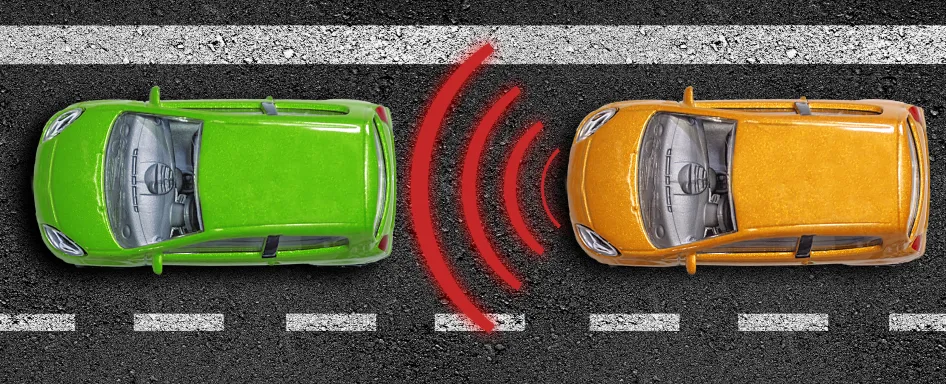
" alt="frenada" />

Modele el control del proceso de frenada empleando 3 señales trapezoidales para la velocidad a la que circula nuestro vehículo, la distancia al vehículo delantero y para el porcentaje de frenada. Para ello:


-Defina los rangos de las variables de entrada y salida.

-Defina 3 funciones de pertenencia para cada una de las variables de entrada y salida.

-Cree las entradas y salidas en función de las etiquetas lingüísticas.

-Asocie a cada etiqueta lingüística su correspondiente función de pertenencia.

-Visualice las funciones de pertenencia.

-Defina las reglas para el sistema de control.

-Cree el sistema de control.


Si circulamos a 100 Km/h hora y nos encontramos a 100m del vehículo ¿Qué porcentaje de frenanda habrá que aplicar?<br><br><br>


Implemente una simulación del control del proceso en el tiempo durante 20 _s_ con una discretización de 1 _s_.
Supongamos que puede aproximar el decremento de la velocidad por frenada según la relación

_v(t+1)=v(t)-(f(t)/100)*2_ 

donde _v(t)_ es la velocidad a la que circula nuestro vehículo en km/h, _f(t)_ es el porcentaje de frenada y el decremento de la distancia al vehículo delantero en esta situación se puede aproximar por

_d(t+1)=d(t)-(v(t)/120)*5_

donde _d(t)_ es la distancia al vehículo delantero en m.

Represente en el dominio del tiempo la velocidad _v(t)_, distancia _d(t)_ y frenada _f(t)_.


In [4]:
#Implemente las librerías mencionadas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [5]:
# Definimos los universos de cada una de las variables:
velocidad = np.arange(0, 121, 1)
distancia = np.arange(0, 201, 1)
frenada = np.arange(0, 100.5, 0.5)


In [6]:
# FUNCIONES DE PERTENENCIA PARA CADA VARIABLE:
velocidad_alta = fuzz.trapmf(velocidad, [80, 100, 120, 121])
velocidad_media = fuzz.trapmf(velocidad, [40, 60, 80, 90])
velocidad_baja = fuzz.trapmf(velocidad, [-1, -1, 30, 50])

distancia_grande = fuzz.trapmf(distancia, [120, 150, 200, 201])
distancia_media = fuzz.trapmf(distancia, [50, 75, 110, 130])
distancia_pequeña = fuzz.trapmf(distancia, [-1, -1, 50, 70])

frenazo = fuzz.trapmf(frenada, [60, 70, 100, 101])
freno_normal = fuzz.trapmf(frenada, [30, 40, 60, 70])
toque_al_freno = fuzz.trapmf(frenada, [-1, -1, 20, 38.5])


In [7]:
# Definir las variables de entrada(antecedentes) y la de salida(consecuente):
velocidad_input = ctrl.Antecedent(velocidad, 'velocidad')
distancia_input = ctrl.Antecedent(distancia, 'distancia')

frenada_output = ctrl.Consequent(frenada, 'frenada')


In [8]:
# ASIGNAMOS LAS FUNCIONES DE PERTENENCIA A CADA ETIQUETA LINGÜISTICA:
velocidad_input['alta'] = velocidad_alta
velocidad_input['media'] = velocidad_media
velocidad_input['baja'] = velocidad_baja


distancia_input['grande'] = distancia_grande
distancia_input['media'] = distancia_media
distancia_input['pequeña'] = distancia_pequeña


frenada_output['frenazo'] = frenazo
frenada_output['freno normal'] = freno_normal
frenada_output['toque'] = toque_al_freno

/home/pyros05/anaconda3/envs/ML_II/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


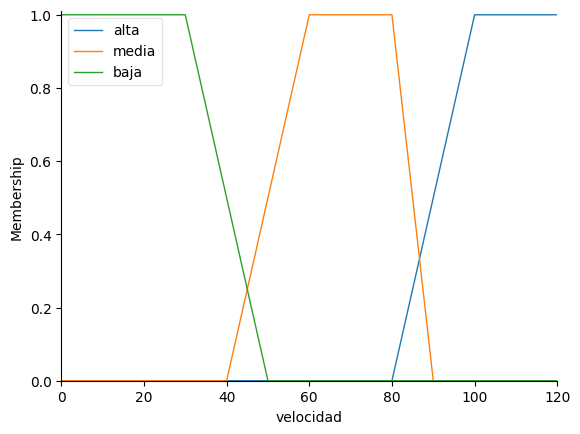

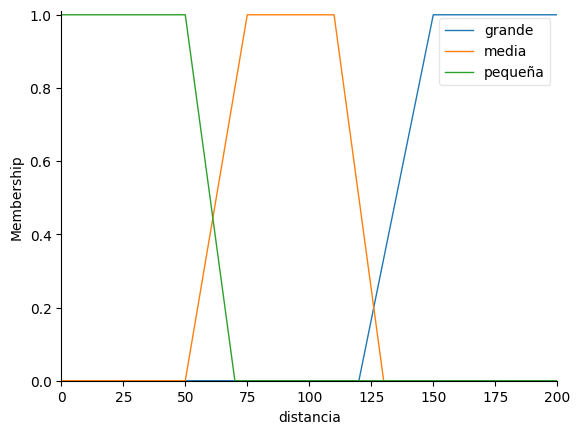

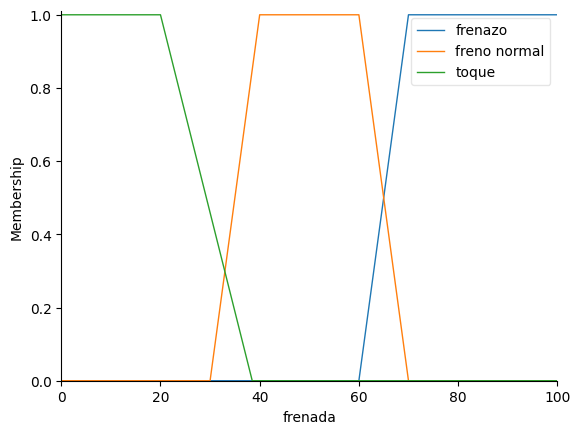

In [9]:
# Visualizar las funciones de pertenencia
velocidad_input.view()
distancia_input.view()
frenada_output.view()

In [10]:
# Definir las reglas difusas
rule1 = ctrl.Rule(velocidad_input['alta'] & distancia_input['grande'], frenada_output['freno normal'] )
rule2 = ctrl.Rule(velocidad_input['media'] & distancia_input['media'], frenada_output['freno normal'] )
rule3 = ctrl.Rule(velocidad_input['baja'] & distancia_input['pequeña'], frenada_output['toque'] )

rule4 = ctrl.Rule(velocidad_input['alta'] & (distancia_input['pequeña'] | distancia_input['media']), frenada_output['frenazo'] )


rule5 = ctrl.Rule(velocidad_input['baja'] | distancia_input['grande'], frenada_output['toque'] )




In [11]:
# Crear el sistema de control difuso
sistema_frenada = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# SIMULADOR:
frenada_prediccion = ctrl.ControlSystemSimulation(sistema_frenada)

In [12]:
frenada_prediccion.input['velocidad'] = 100
frenada_prediccion.input['distancia'] = 100
frenada_prediccion.compute()
print(f"Porcentaje de frenada aplicada: {frenada_prediccion.output['frenada']:.2f} %")

Porcentaje de frenada aplicada: 82.38 %


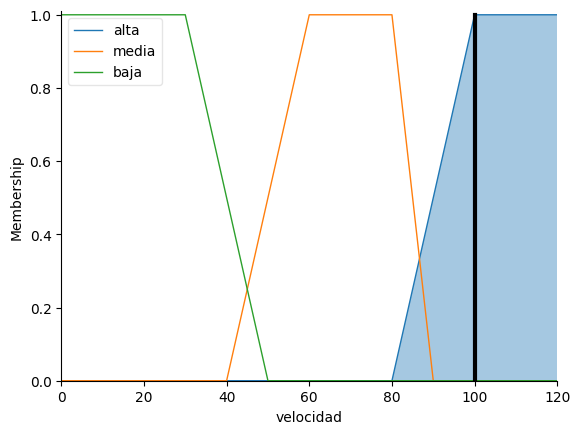

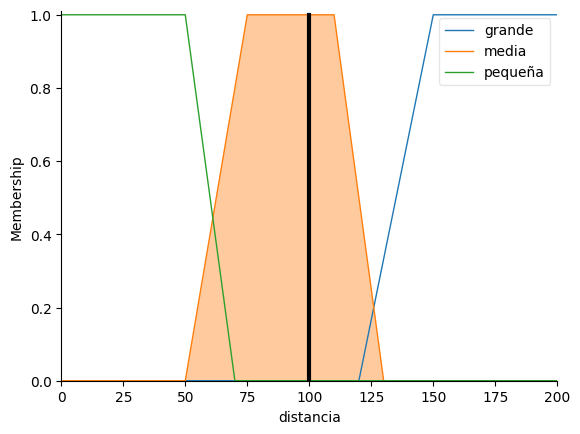

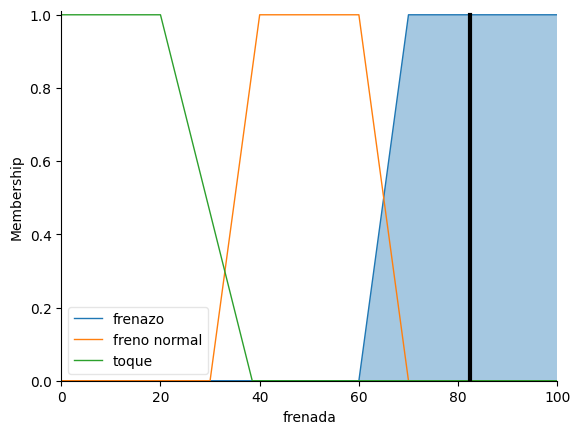

In [13]:
# VISUALIZACIÓN GRÁFICA DE LA PREDICCIÓN:
velocidad_input.view(sim=frenada_prediccion)
distancia_input.view(sim=frenada_prediccion)
frenada_output.view(sim=frenada_prediccion)

Implemente una simulación del control del proceso en el tiempo durante 20 _s_ con una discretización de 1 _s_.
Supongamos que puede aproximar el decremento de la velocidad por frenada según la relación

_v(t+1)=v(t)-(f(t)/100)*2_ 

donde _v(t)_ es la velocidad a la que circula nuestro vehículo en km/h, _f(t)_ es el porcentaje de frenada y el decremento de la distancia al vehículo delantero en esta situación se puede aproximar por

_d(t+1)=d(t)-(v(t)/120)*5_

donde _d(t)_ es la distancia al vehículo delantero en m.

Represente en el dominio del tiempo la velocidad _v(t)_, distancia _d(t)_ y frenada _f(t)_.

In [14]:
seg_simulacion = 20

# Partimos de una velocidad actual de 100km/h y una distancia hasta el otro vehículo de 120 metros
velocidad_actual  = 100
dist_actual = 120

velocidades  = np.zeros(seg_simulacion)
distancias = np.zeros(seg_simulacion)
frenadas = np.zeros(seg_simulacion)
tiempos  = np.arange(0, seg_simulacion, 1)

for t in tiempos:
    # Asignamos los valores a las entradas
    frenada_prediccion.input['velocidad'] = velocidad_actual
    frenada_prediccion.input['distancia'] = dist_actual

    # Ejecutamos .compute() para que haga los cálculos
    frenada_prediccion.compute()

    # Obtenemos las salidas
    frenada_actual = frenada_prediccion.output['frenada']

    # Guardamos los datos para mostrarlos posteriormente
    velocidades[t]  = velocidad_actual
    distancias[t] = dist_actual
    frenadas[t] = frenada_actual

    # Actualizamos la velocidad y la distancia al vehículo de manera instantánea con el paso de cada segundo
    velocidad_actual = velocidad_actual - (frenada_actual / 100)*2
    dist_actual = dist_actual - (velocidad_actual / 120)*5


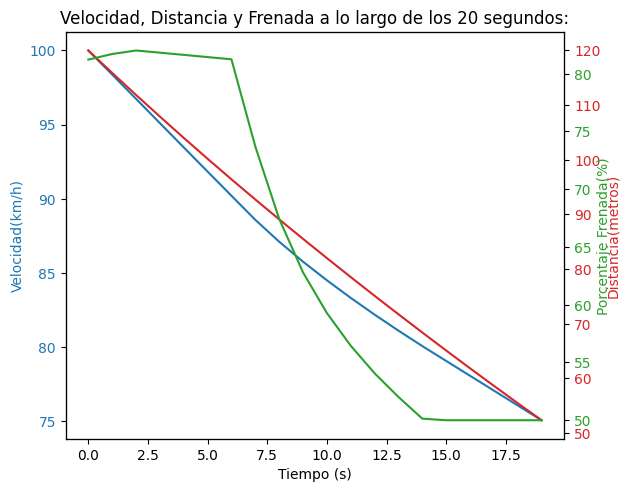

In [15]:
# REPRESENTACIÓN GRÁFICA DE LA SIMULACIÓN PARA UN VEHÍCULO QUE VA A 100KM/H Y SE ENCUENTRA A 120 METROS DE UN OBSTÁCULO EN LA CARRETERA:

fig, ax1 = plt.subplots()

ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Velocidad(km/h)', color='tab:blue')
ax1.plot(tiempos, velocidades, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Distancia(metros)', color='tab:red')
ax2.plot(tiempos, distancias, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax3 = ax1.twinx()
ax3.set_ylabel('Porcentaje Frenada(%)', color='tab:green')
ax3.plot(tiempos, frenadas, color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Velocidad, Distancia y Frenada a lo largo de los 20 segundos:')
plt.show()